Kuwahara filter is a non-linear smoothing filter that preserves edges while reducing noise. The filter divides the neighborhood around each pixel into four overlapping subregions and calculates the mean and variance for each region. The output for each pixel is the mean of the subregion with the minimum variance, meaning the area with the least amount of change (or the smoothest area) is selected to represent the pixel.

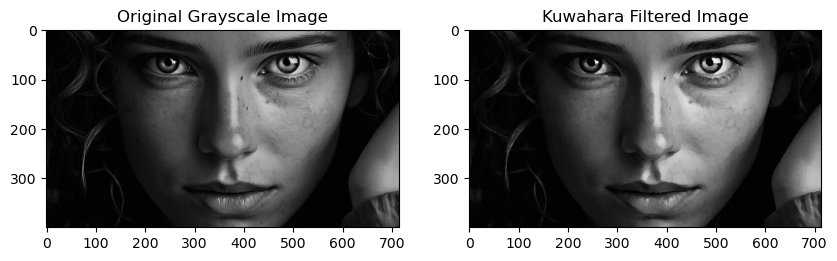

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def kuwahara_filter(img, window_size=5):
    pad_size = window_size // 2
    padded_img = np.pad(img, pad_size, mode='reflect')
    output = np.zeros_like(img)

    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            region = padded_img[i:i+window_size, j:j+window_size]
            subregions = [
                region[0:pad_size+1, 0:pad_size+1],  # Top-left
                region[0:pad_size+1, pad_size:],     # Top-right
                region[pad_size:, 0:pad_size+1],     # Bottom-left
                region[pad_size:, pad_size:]         # Bottom-right
            ]
            subregion_means = [np.mean(sr) for sr in subregions]
            subregion_variances = [np.var(sr) for sr in subregions]

            # Select the subregion with the minimum variance
            min_variance_idx = np.argmin(subregion_variances)
            output[i, j] = subregion_means[min_variance_idx]

    return output

# Load the image and convert to grayscale
img = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Kuwahara filter
filtered_img = kuwahara_filter(img)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Kuwahara Filtered Image')

plt.show()
